<div class='alert alert-info' style="font-family: 'Segoe UI'; font-weight: 300">
    <center> <h1> Prediction model using Points & Rebounds - Linear Regression </h1> </center>
</div>

<h1 id="libraries"> Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

<h1> Files </h1>

In [2]:
regular_season = pd.read_csv("Data_regular_season.csv")
playoffs = pd.read_csv("Data_playoffs.csv")

<h2 id="overview">Overview </h2>

In [3]:
regular_season.set_index("Player",inplace=True)
playoffs.set_index("Player",inplace=True)

<h3> Regular season </h3>

In [4]:
regular_season.head(5)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,34241,9346,9405,2015,957,3
MJ,32292,5633,6672,1944,893,2
Kareem,38387,5660,17440,1160,3189,5
Kobe,33643,6306,7047,1944,640,2
Karl_Malone,36928,5248,14968,2085,1145,4


<h3> Playoffs </h3>

In [5]:
playoffs.head(5)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,7491,1871,2348,445,250,3
MJ,5987,1022,1152,376,158,2
Kareem,5762,767,2481,189,476,5
Kobe,5640,1040,1119,310,144,2
Karl_Malone,4761,610,2062,258,135,4


<h3> Totals </h3>

In [6]:
totals = pd.Series(regular_season.sum(axis=1)+playoffs.sum(axis=1))
totals.head()

Player
LeBron         68375
MJ             56133
Kareem         75521
Kobe           57837
Karl_Malone    68208
dtype: int64

<h1> Creating the linear model </h1>

In [7]:
lm = LinearRegression(normalize=True)
lm

LinearRegression(normalize=True)

<h2> Independent (X) and dependent (Y) variables </h2>

In [8]:
X1 = regular_season[["Points","Rebounds"]]+playoffs[["Points","Rebounds"]]
Y1 = totals
Y1.head(10)

Player
LeBron         68375
MJ             56133
Kareem         75521
Kobe           57837
Karl_Malone    68208
Wilt           68189
Shaq           57118
Duncan         59396
Dirk           54946
Hakeem         56068
dtype: int64

<h1> 1- Without train/test split </h1>

<h2>a. Fitting the created model </h2>

In [9]:
lm.fit(X1,Y1)

LinearRegression(normalize=True)

<h2> b. Test: predicting values </h2>

In [10]:
Yhat1 = lm.predict(X1)
Yhat1[0:5]

array([64098.17165145, 57042.93460798, 73223.73178519, 58475.74460383,
       68126.3984963 ])

<h2> Plotting function </h2>

In [11]:
def distribution_plot(actual_values, predicted_values):
   
    plt.figure(figsize=(8, 4))
    
    actual_plot = sns.kdeplot(actual_values,label="Actual values")
    predicted_plot = sns.kdeplot(predicted_values, ax=actual_plot, label="Predicted values")
    actual_plot.legend()
    
    plt.title("Actual values vs Predicted values")
    

<h2> c. Plotting the LM using points AND rebounds : <i> distribution plot </i> </h2>

Coefs = [1.16384364 0.77283914] 
Intercepts = 6445.470635867299

Yhat = 6445.470635867299 + 1.163843636751765*Points + 0.7728391361060727*Rebounds

For example, a player with 38.000 points and 7800 rebounds must likely have 56700


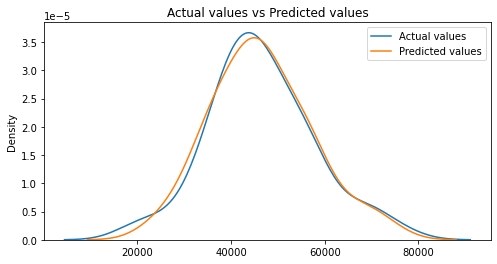

In [12]:
print(f"Coefs = {lm.coef_} ")
print(f"Intercepts = {lm.intercept_}")
print(f"\nYhat = {lm.intercept_} + {lm.coef_[0]}*Points + {lm.coef_[1]}*Rebounds")

print(f"\nFor example, a player with 38.000 points and 7800 rebounds must likely have {round(lm.intercept_+lm.coef_[0]*38000+lm.coef_[1]*7800)}")

distribution_plot(Y1,Yhat1)

<center class='alert alert-info'>  
    <span style="color: blue; padding: 3px; border-radius: 5px"> Yhat = 6445.470635867299  + 1.163843636751765*Points + 0.7728391361060727*Rebounds
    </span> 
</center>

<h2> d. R2 score: Evaluating the model </h2>

In [13]:
print(f"Model score: {lm.score(X1,Y1):.2f}")

Model score: 0.91


<h1> 2- With train/test split </h1>

In [14]:
from sklearn.model_selection import train_test_split

<h3>Parameters</h3>
<ul>
    <li>Train size: 85%</li>
    <li>Test size: 15%</li>
</ul>

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.15,random_state=1)

In [16]:
lm.fit(x_train,y_train)

LinearRegression(normalize=True)

<h2> Plotting the results </h2>

In [17]:
Yhat_train = lm.predict(x_train)
Yhat_test = lm.predict(x_test)

<h3> Training set </h3>

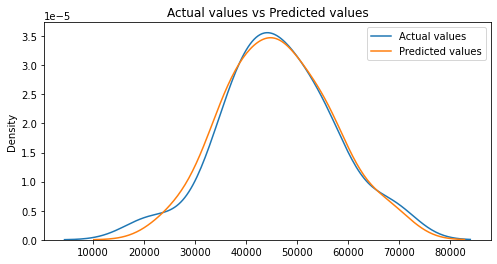

In [18]:
distribution_plot(y_train,Yhat_train)

<h3> R2 score: Evaluating the training set </h3>

In [19]:
print(f"Train set score: {r2_score(y_train,Yhat_train):.2f}")

Train set score: 0.89


<h3> Test set </h3>

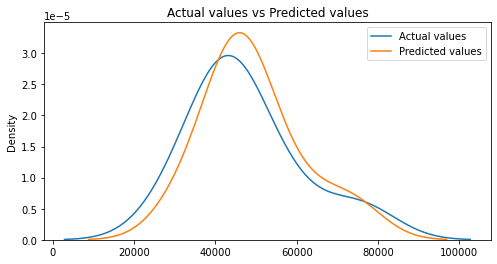

In [20]:
distribution_plot(y_test,Yhat_test)

<h3> R2 score: Evaluating the test set </h3>

In [21]:
print(f"Test set score: {r2_score(y_test,Yhat_test)}")

Test set score: 0.9552835477525088


<center> 
    <span style="text-size: 24px;" class="alert alert-success"> Our model tends not to overfit nor underfit.
    However, since we do not have sufficient test data, let's perform cross-validation
    </span> 
</center>

<h2> Cross-validation </h2>

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [23]:
folds = 3

In [24]:
Rcross = cross_val_score(lm,X1,Y1,cv=folds)
Rcross

array([0.68317947, 0.88915542, 0.77563495])

In [25]:
print(f"The mean of the folds is {Rcross.mean()} and the standard derivation is {Rcross.std():.2f}")
print(f"The accuracy of our model using cross validation with {folds} folds is {Rcross.mean()*100:.2f}%")

The mean of the folds is 0.7826566140835952 and the standard derivation is 0.08
The accuracy of our model using cross validation with 3 folds is 78.27%


In [26]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [27]:
Yhat_train = lm.predict(x_train)
Yhat_train[0:5]

array([45636.77132257, 46374.00953713, 27480.5425375 , 43363.5254786 ,
       41739.36495358])

In [28]:
Yhat_test = lm.predict(x_test)
Yhat_test[0:5]

array([43862.25832034, 47915.21656202, 49092.07877157, 43164.28800883,
       73012.04952061])

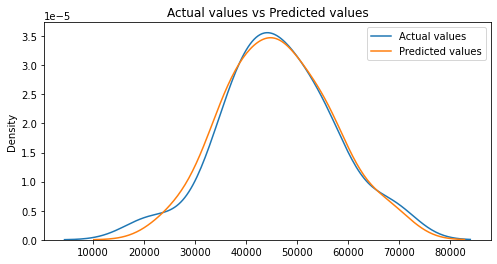

In [29]:
distribution_plot(y_train,Yhat_train)

<h3 class="alert alert-info"> Our model seems to be very close to the actual values, within the [45k;60k] ranges with the training set </h3>

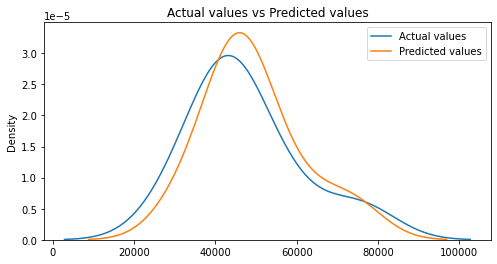

In [30]:
distribution_plot(y_test,Yhat_test)

<h3 class="alert alert-warning"> Test set accuracy is less accurate than expected, with cross-validation. It doesn't seem to be the best solution.   <br>
</h3>

<div style="float: right">Ibrahim SEROUIS</div>